# Welcome to SYSC4415 Assignment 2

> Indented block


---
**TA: Elmira Amooei**

**Questions?: Rather than email, please ask any questions through the Discussion Board on Brightspace. That way, everyone can benefit from the answer**

** Deadline: See Brightspace end date**

---

### The goal is to develop an emotion detection CNN-based model that can detect emotions from images in real-time.

#### Instructions:
> **DO NOT** wait to the last minute to complete this assignment as it can take up to 10 hours to do this assignment if you are unfmiliar with Python and Machine Learning libraries. Your full notebook should not take more than 100 minutes to run on *T4 GPU*. (My full notebook takes under 35 minutes to run on T4 GPU on colab)

>  Step-by-step instructions are given in the notebook. Make sure to follow them all. Your solutions must be self-contained in this notebook; no other supplementary material or files will be accepted. As soon as I open your assignment's notebook , I will click "runtime" → "run all". Ensure your notebook works properly without any errors and your results are clearly displayed, as instructed.

> For text answers, like explanations, make sure to put your answers in the *Markdown* cells below that have this emoji (✅). Just double-click on the emoji and you can start typing. The questions that you must answer are placed in markdown cells with this emoji (❓) .

> Feel free to add code blocks if you wish. However, make sure to have sufficient comments in your code to describe what the code is doing. *( You don't need to add a comment to each line, just make sure it is clear what your functions are doing.)*

> The functions you need are already imported for you in the appropriate sections. You can reorganize the imports or import full packages (instead of specific functions) if you prefer to do so. *Make sure you are not removing the libraries by mistake as it will raise errors when I run your notebook and you will lose mark.*

> The required dataset is uploaded on Brightspace. Download it and store it in your Google Drive. It should be under your "My Drive" (After uploading it to your Google Drive, check the location by right clicking on the file *-> File Information -> Details -> Location*).  **Do not** put it into any sub-folder as  I won't be able to run your code on my data. It will raise an error and you will lose marks.

> I suggest doing your coding and first making sure everything works fine on a CPU. Then do the actual model training on a GPU. To chage your runtime from CPU to GPU and vice versa, select **Runtime** -> **Change Runtime Type** -> under **Hardware accelerator** clock on CPU or T4 GPU.

> Submit your Notebook as a *.ipynb* file that adopts this naming convention: ***SYSC4415W24_A2_FIRSTNAME_LASTNAME_StudentID.ipynb*** on *Brightspace*. No other submission (e.g., through email) will be accepted.


# 0) Context

Meet Dr. Emily Hayes(👩🏻‍⚕️), a leading psychologist who specializes in treating patients with various emotional disorders. Despite her expertise, Dr. Hayes often finds it challenging to accurately assess her patients' emotions during therapy sessions. Traditional methods, such as self-reporting and facial expressions, can be unreliable and subjective.

Determined to find a more effective solution, Dr. Hayes hears of James Green who works with a team of data scientists and engineers that can develop an emotion recognition model based on the Facial Expression Recognition 2013 (FER-2013) image dataset. This dataset contains thousands of facial images labeled with six basic emotions: happiness, sadness, anger, surprise, disgust, and fear (plus 'neutral').

Together, they embark on a journey to create a convolutional neural network (CNN) capable of accurately identifying and interpreting subtle facial cues. Their goal is to build a tool that can assist therapists like Dr. Hayes in better understanding their patients' emotions and providing more targeted interventions.

# 1) Initializations


Run this cell to mount Google Drive

*Note that it will open a new window to get authorizations to use your Google Drive. Just follow the steps.*

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzip the data into a folder called FER-2013.

> This will take a few moments.

> This will not take any space on your Google Drive. 🤗

In [128]:
# Unzip the data (be sure not to rename the data file you downloaded from Brightspace)
!unrar x /content/drive/MyDrive/FER-2013.rar


Streaming output truncated to the last 5000 lines.
Extracting  FER-2013/sad/Training_80974723.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_80981346.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81008287.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81013514.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81039583.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81048535.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81053420.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81075199.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81097657.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81101893.jpg                            85%  OK 
Extracting  FER-2013/sad/Trai

In [129]:
# Importing necessary libraries
import pandas as pd
import os

There are 7 categories to your dataset as you can see below:

In [130]:
data_path = "/content/FER-2013"
categories = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

1. Use "data_path" and "categories" above to  loop over the image paths and poplate a pandas dataframe with data and the corresponding emotion from each file. Print out the dimensions of your entire dataframe using `print()`.

In [131]:
# Put data into dataframe

data = {}
for i in categories:
  for j in os.listdir(data_path):
    if (i == j):
      data[i] = pd.Series(os.listdir(data_path + "/" + j))

df = pd.DataFrame(data)

2. Use the `head` method to print out the first 7 rows.



In [132]:
# Print the top 3 rows

print(df.head(3))


                   angry                disgust                      fear  \
0  Training_89232926.jpg  Training_64347942.jpg  PrivateTest_57411661.jpg   
1  Training_87008999.jpg  Training_57324305.jpg     Training_27235791.jpg   
2  Training_72428050.jpg  Training_70344662.jpg     Training_98046368.jpg   

                   happy                      sad                surprise  \
0  Training_39225554.jpg    Training_79860018.jpg   Training_24767066.jpg   
1  Training_63335593.jpg  PublicTest_14591455.jpg  PublicTest_3560560.jpg   
2  Training_40511838.jpg    Training_73593223.jpg   Training_18553978.jpg   

                 neutral  
0  Training_52098153.jpg  
1   Training_3218333.jpg  
2  Training_14779081.jpg  


In [133]:
# Import the necessary library
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

3. Use the library above to look at one image from each of the categories.

*Please, do NOT apply any transformation to the images.*


EMOTION - angry



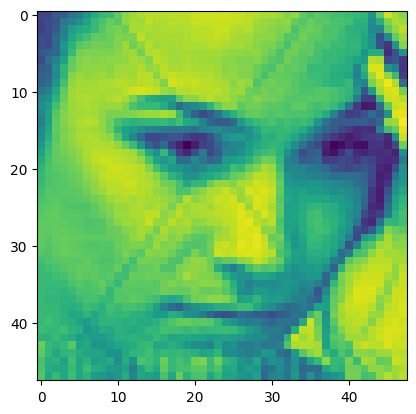


EMOTION - disgust



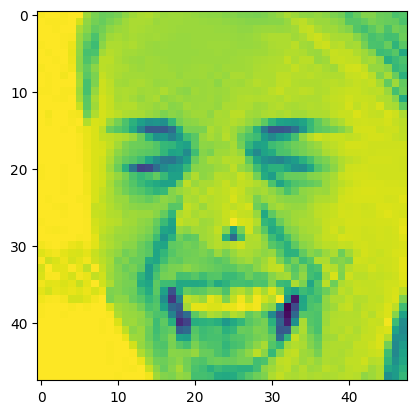


EMOTION - fear



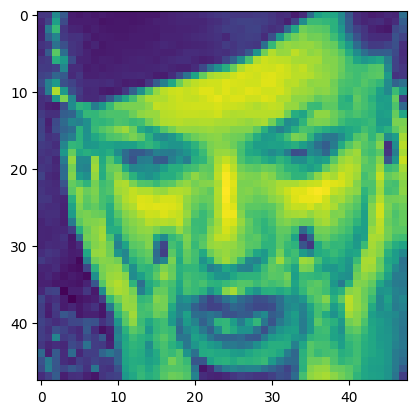


EMOTION - happy



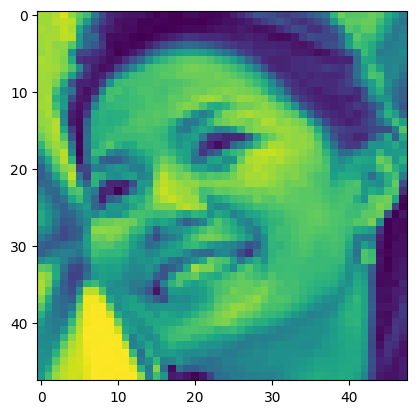


EMOTION - sad



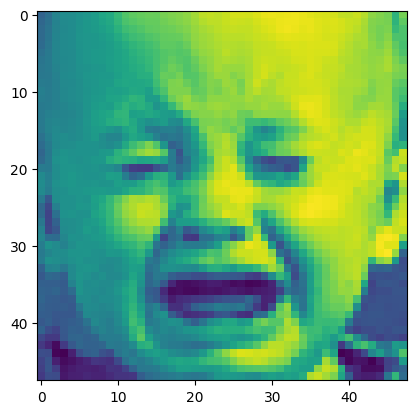


EMOTION - surprise



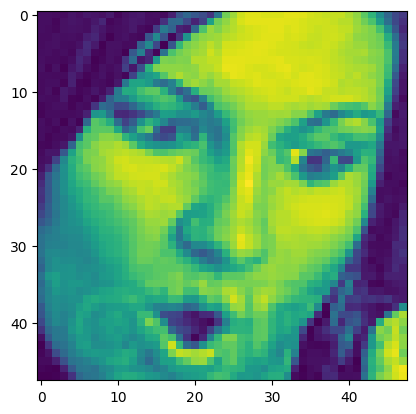


EMOTION - neutral



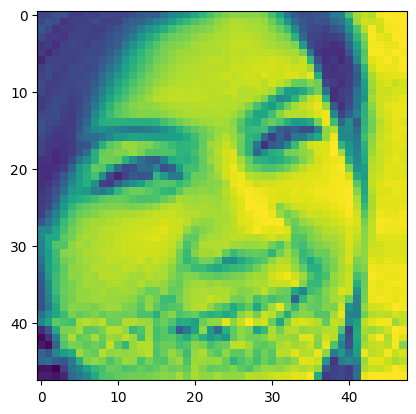

In [134]:
# show one image of each of the categories

for i in categories:
  print("\nEMOTION - " + i + "\n")
  img = mpimg.imread(data_path + "/" + i + "/" + df[i].iloc[0])
  imgplot = plt.imshow(img)
  plt.show()

# 2) Preprocessing

Let's start off by doing some preproccessing:

1. Make sure your images are all 48*48. Use assert() and resize() if needed.
2. Covert your images to grayscale.
3. Using **Pytorch**, create a dataloader and split your dataset into 80% train and 20% test.
4. Create two bar charts showing the distribution of each of the 7 class labels in both your training and testing subsets.

 *Note that the methods you need are already imported.*

❓

1. Do we need to use one-hot encoding? Why or why not?
2. How will the grayscale transformation help our training?

✅  
1. Since the images were switched into grayscale and not RGB, we would not need to use one-hot encoding. This is because one-hot encoding is use to differentiate between various different inputs by switching them to a binary list depending on the types of inputs. For example, red green and blue could be represented as [1, 0, 0], [0, 1, 0], and [0, 0, 1] respectively. But since the images are in grayscale, the neural network only needs to look at the brightness of a pixel, making it a one dimensional analysis.

  As per the categories, you do not need to use one-hot encoding as the images are already sorted into categories based on the file path. We are simply looping through each emotion that has been pre-identified with a training set. Therefore, one-hot encoding is not needed.


2. Changing all the images to grayscale will help the training by forcing the images into a comparable one dimensional state. Since all the pixels are the same colour and its only the brightness that changes in a grayscale image, the training will be more accurate and can generlize better. Whereas an RGB image would take longer to train because it has to compare the brightness as well as the RGB combination between all the images and it would generalize worse as it would have to take into account more information.

In [135]:
# Import the necessary library
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [136]:
# Define data transformations and change images to grayscale

transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

dataset = ImageFolder(root=data_path, transform=transform)

In [137]:
# split the dataset into train and test

total_size = len(dataset)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

train_set, test_set = random_split(dataset, [train_size, test_size])

batch_size = 48
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

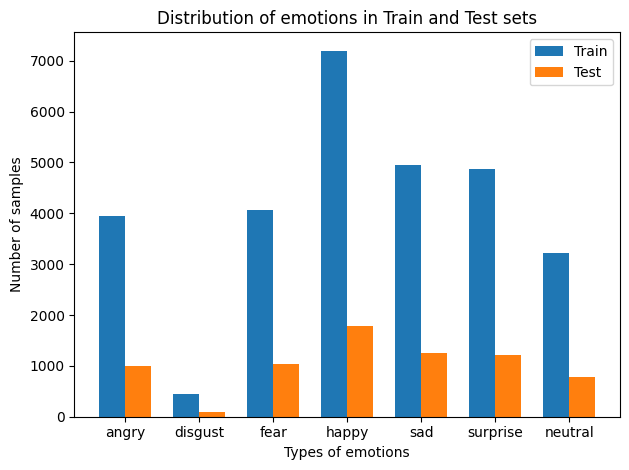

In [138]:
# Create two bar charts showing the distribution of each of the 7 class labels in both your training and testing subsets.

train_labels = [0] * 7
test_labels = [0] * 7

for data, label in train_loader:
  for i in range(len(label)):
    train_labels[label[i]] += 1

for data, label in test_loader:
  for i in range(len(label)):
    test_labels[label[i]] += 1

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots()

ax.bar(x - width/2, train_labels, width, label='Train')
ax.bar(x + width/2, test_labels, width, label='Test')

ax.set_ylabel('Number of samples')
ax.set_xlabel('Types of emotions')
ax.set_title('Distribution of emotions in Train and Test sets')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

fig.tight_layout()

plt.show()

# 3) Baseline model

Create a baseline CNN model. You will improve on this model later on...

Your  CNN should:
1. Have two convolutional layers,
2. Use a Padding = 1,
3. Have a Kernel size = 3,
4. Have one max pooling layer.


*Note that the libararies you will need are already imported here.*

In [139]:
# Import the necessary library
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torchsummary

In [140]:
# Import possible choices
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import  classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import  roc_auc_score

In [141]:
# Define your baseline CNN

batch_size = 48
learning_rate = 0.001
num_epochs = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class BaseCNN(nn.Module):
  def __init__(self, num_classes):
    super(BaseCNN, self).__init__()
    # was using out_channel=32
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
    # was using in_channel=32 and out_channel=64
    # am not using it now as it took 45+ minutes to train but increase the accuracy by 5%
    # now I loose 5% accuracy byt it takes <10 minutes
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=3, stride=3)

    self.lin1 = nn.Linear(4096, 16)
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(16, num_classes)

  def forward(self, x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = self.pool(out)

    out = out.reshape(out.size(0), -1)

    out = self.lin1(out)
    out = self.relu(out)
    out = self.lin2(out)
    return out

model = BaseCNN(len(categories))

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.005, momentum=0.9)

total_step = len(train_loader)

actual_labels = []
pred_labels = []

for epoch in range(num_epochs):
  model.train()
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('Epoch [{}/{}], Loss: {}'.format(epoch+1, num_epochs, loss.item()))

model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    pred_labels.extend(predicted)
    actual_labels.extend(labels)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Final accuracy of the network: {} %'.format(100 * correct / total))
  print('Final metrics for measuring correctness of model:\n', classification_report(y_true=actual_labels, y_pred=pred_labels, target_names=categories))


Epoch [1/10], Loss: 1.6644437313079834
Epoch [2/10], Loss: 1.7282896041870117
Epoch [3/10], Loss: 1.3571568727493286
Epoch [4/10], Loss: 1.9223883152008057
Epoch [5/10], Loss: 1.5210473537445068
Epoch [6/10], Loss: 0.8500581979751587
Epoch [7/10], Loss: 1.8228003978729248
Epoch [8/10], Loss: 1.3497947454452515
Epoch [9/10], Loss: 1.644197702407837
Epoch [10/10], Loss: 2.2416789531707764
Final accuracy of the network: 39.77431039286709 %
Final metrics for measuring correctness of model:
               precision    recall  f1-score   support

       angry       0.28      0.16      0.21       999
     disgust       0.00      0.00      0.00        99
        fear       0.28      0.12      0.17      1046
       happy       0.47      0.70      0.56      1789
         sad       0.35      0.44      0.39      1248
    surprise       0.32      0.31      0.31      1206
     neutral       0.53      0.49      0.51       791

    accuracy                           0.40      7178
   macro avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


❓

List 3 ideas for how you will improve your baseline model (e.g., change the padding, kernel, etc.) For each idea, explain why you believe the idea may improve your model.

*Below, you apply your ideas to the CNN you will build in later steps and report how they made your results better/worse.*

✅
1. Change the optimizer algorithm (Adam, Adagrad, etc. choosing the best out of them). This will also impact the loss score, potentially decreasing the loss and increasing the correctness of the model
2. Change the kernel size of the max pooling from 3 to 2. This will make the max pooling window smaller as a 2x2, increasing the accuracy of the f1 score by reducing the size of the output image.
3. Increase the number of epochs from 10 to 20. This will aide the model in generalizing the data better.

# 4) Lets train our baseline model!

1. Train your baseline CNN below for 10 epochs.
2. Print the loss for each epoch.
3. Evaluate your model on the test data.


❓

Choose one performance metric to report your results. Explain why you chose this metric. (e.g. accuarcy, recall, etc.)

✅ I will be using the f1 score metric to measure my results. This is because f1 is a mean combination between precision and recall. Precision measures the overall correct positive predictions to the overall number of positive predictions. Recall measures the overall correct positive predictions to the overall number of positive examples. F1 score uses both of them, taking into account the precision and recall of the model. This ensures that the accuracy returned is a balanced and accurate representation of the entire model, comparing both types of positive predictions and expected outputs. Even though I could technically use recall as a metric since its usually yields a higher accuracy, I think the f1 score is a more honest and accurate depiction of my model.

In [142]:
# Initialize your model

class BaseCNN(nn.Module):
  def __init__(self, num_classes):
    super(BaseCNN, self).__init__()
    # was using out_channel=32
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
    # was using in_channel=32 and out_channel=64
    # am not using it now as it took 45+ minutes to train but increase the accuracy by 5%
    # now I loose 5% accuracy byt it takes <10 minutes
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=3, stride=3)

    self.lin1 = nn.Linear(4096, 16)
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(16, num_classes)

  def forward(self, x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = self.pool(out)

    out = out.reshape(out.size(0), -1)

    out = self.lin1(out)
    out = self.relu(out)
    out = self.lin2(out)
    return out


In [143]:
# Initialize your model, loss function, and optimizer

batch_size = 48
learning_rate = 0.001
num_epochs = 10

model = BaseCNN(len(categories))

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.005, momentum=0.9)

total_step = len(train_loader)

actual_labels = []
pred_labels = []


In [144]:
#Test using your choosen metric

for epoch in range(num_epochs):
  model.train()
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('Epoch [{}/{}], Loss: {}'.format(epoch+1, num_epochs, loss.item()))

model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    pred_labels.extend(predicted)
    actual_labels.extend(labels)

  print('Final accuracy of the network: {} %'.format(100 * f1_score(y_true=actual_labels, y_pred=pred_labels, average='weighted')))


Epoch [1/10], Loss: 1.6912885904312134
Epoch [2/10], Loss: 2.0614798069000244
Epoch [3/10], Loss: 1.957763671875
Epoch [4/10], Loss: 1.1317405700683594
Epoch [5/10], Loss: 1.5976321697235107
Epoch [6/10], Loss: 1.6468662023544312
Epoch [7/10], Loss: 1.3670761585235596
Epoch [8/10], Loss: 1.6433833837509155
Epoch [9/10], Loss: 1.6772466897964478
Epoch [10/10], Loss: 2.0191280841827393
Final accuracy of the network: 36.59043864718424 %


❓

Plot the confusion matrix for your results. Explain to Dr. Hayes what this confusion matrix is showing and how she can interpret it. Also, explain how your chosen performance metric relates to the confusion table *(in plain language, not an equation)*.

* *Note that the libraries you need are imported below.*

✅ The confusion matrix below depicts where a emotion is correctly predicted as the correct emotion versus other emotions that it was false predicted to be. For example, the dark blue on the happy/happy (x/y) scale depicts that roughly 1265 images were correctly predicted to be happy. Where as on the happy/fear scale, 284 images were incorrectly predicted as fear when they were supposed to be happy.
This is another reason why I chose the f1 performance metric as this confusion matrix deals with both the false positive (angry/happy x/y) and false negative (happy/fear x/y) and needs to take into account both to have the best correctness of the algorithm.

In [145]:
# Import the necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

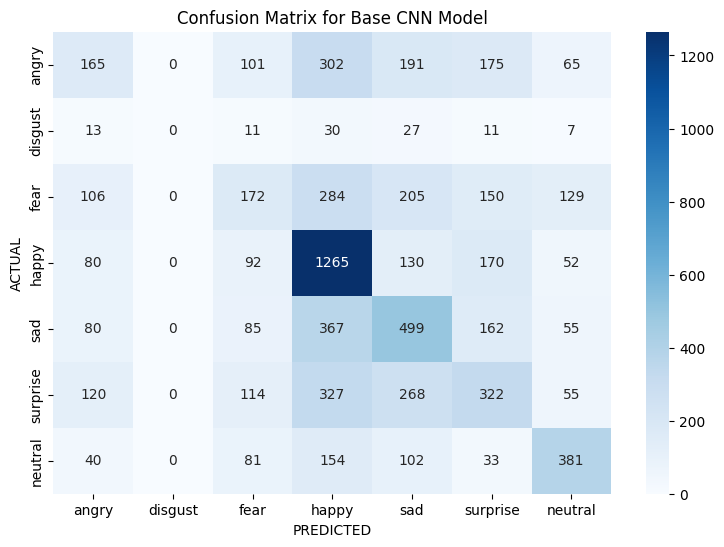

In [146]:
# Compute and plot the confusion matrix

matrix = confusion_matrix(y_true=actual_labels, y_pred=pred_labels)
plt.figure(figsize=(9, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Base CNN Model')
plt.show()

# 5) The real deal!

Lets improve your CNN to improve your baseline model!

Try to obtain a model that has the **best performance** (based on the metric you decided is best).

Make sure to include your 3 ideas on how to improve your baseline model (that you mentioned in a question box a few cells ago.)

* Make sure that your code shows how you explored different ideas.
* Each of the three attempts below should show the addition of one new idea in your model.
* Include performance evaluation using your selected performance metric and a confusion matrix.
* Be sure to add comments in the code blocks to show how you modified the model architecture.

## 5a) Your first (🥇) attempt at improving your model goes here. 👇🏻

In [147]:
# Define your improved CNN model, call it ImprovedCNNOne()

# IDEA 1
# Change the optimizer algorithm (Adam, Adagrad, etc. choosing the best out of them).
# This will also impact the loss score, potentially decreasing the loss and increasing
# the correctness of the model

class ImprovedCNNOne(nn.Module):
  def __init__(self, num_classes):
    super(ImprovedCNNOne, self).__init__()
    # was using out_channel=32
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
    # was using in_channel=32 and out_channel=64
    # am not using it now as it took 45+ minutes to train but increase the accuracy by 5%
    # now I loose 5% accuracy byt it takes <10 minutes
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=3, stride=3)

    self.lin1 = nn.Linear(4096, 16)
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(16, num_classes)

  def forward(self, x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = self.pool(out)

    out = out.reshape(out.size(0), -1)

    out = self.lin1(out)
    out = self.relu(out)
    out = self.lin2(out)
    return out


batch_size = 48
learning_rate = 0.001
num_epochs = 10

model = ImprovedCNNOne(len(categories))

criterion = nn.CrossEntropyLoss()

# increases the accuracy of the model by roughly 10%
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.005)

total_step = len(train_loader)

actual_labels = []
pred_labels = []

for epoch in range(num_epochs):
  model.train()
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('Epoch [{}/{}], Loss: {}'.format(epoch+1, num_epochs, loss.item()))


Epoch [1/10], Loss: 1.751623511314392
Epoch [2/10], Loss: 1.6165409088134766
Epoch [3/10], Loss: 1.4233887195587158
Epoch [4/10], Loss: 0.9696756601333618
Epoch [5/10], Loss: 1.394694209098816
Epoch [6/10], Loss: 1.5083056688308716
Epoch [7/10], Loss: 1.625210165977478
Epoch [8/10], Loss: 1.005889892578125
Epoch [9/10], Loss: 1.1246721744537354
Epoch [10/10], Loss: 2.133955955505371


In [148]:
# Evaluation on the test set

model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    pred_labels.extend(predicted)
    actual_labels.extend(labels)

  print('Final accuracy of the network: {} %'.format(100 * f1_score(y_true=actual_labels, y_pred=pred_labels, average='weighted')))



Final accuracy of the network: 43.84876925697081 %


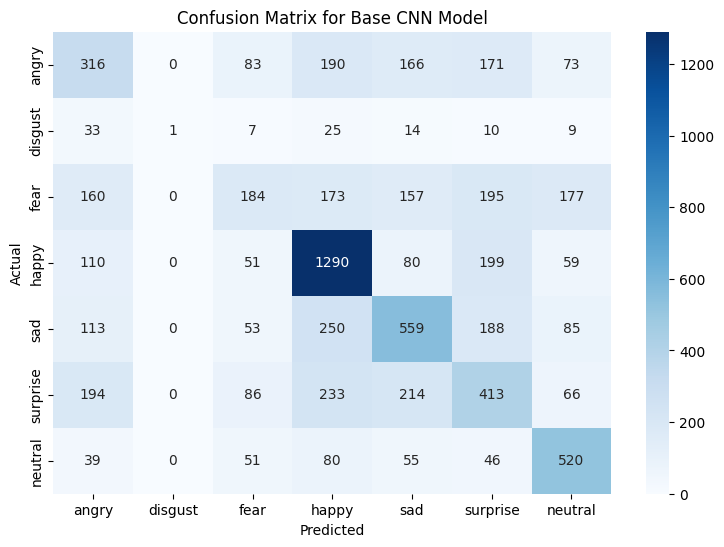

In [149]:
# Evaluate model and create the confusion matrix

matrix = confusion_matrix(y_true=actual_labels, y_pred=pred_labels)
plt.figure(figsize=(9, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Base CNN Model')
plt.show()

## 5b) Your second (🥈) **attempt** at improving your model goes here. 👇🏻

In [150]:
# Define your finetuned CNN model, call it ImprovedCNNTwo()

# IDEA 2
# Change the kernel size of the max pooling from 3 to 2. This will make the
# max pooling window smaller as a 2x2, increasing the accuracy of the f1 score
# by reducing the size of the output image.

class ImprovedCNNTwo(nn.Module):
  def __init__(self, num_classes):
    super(ImprovedCNNTwo, self).__init__()
    # was using out_channel=32
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
    # was using in_channel=32 and out_channel=64
    # am not using it now as it took 45+ minutes to train but increase the accuracy by 5%
    # now I loose 5% accuracy byt it takes <10 minutes
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.lin1 = nn.Linear(9216, 16)
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(16, num_classes)

  def forward(self, x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = self.pool(out)

    out = out.reshape(out.size(0), -1)

    out = self.lin1(out)
    out = self.relu(out)
    out = self.lin2(out)
    return out


batch_size = 48
learning_rate = 0.001
num_epochs = 10

model = ImprovedCNNTwo(len(categories))

criterion = nn.CrossEntropyLoss()

# kept Adam in since there was such an improvement
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.005)

total_step = len(train_loader)

actual_labels = []
pred_labels = []

for epoch in range(num_epochs):
  model.train()
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('Epoch [{}/{}], Loss: {}'.format(epoch+1, num_epochs, loss.item()))


Epoch [1/10], Loss: 1.4714716672897339
Epoch [2/10], Loss: 1.4125951528549194
Epoch [3/10], Loss: 1.189327359199524
Epoch [4/10], Loss: 1.5041704177856445
Epoch [5/10], Loss: 2.311150550842285
Epoch [6/10], Loss: 1.0807592868804932
Epoch [7/10], Loss: 1.1313749551773071
Epoch [8/10], Loss: 1.14827299118042
Epoch [9/10], Loss: 1.653902292251587
Epoch [10/10], Loss: 1.9114071130752563


In [151]:
# Evaluation on the test set

model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    pred_labels.extend(predicted)
    actual_labels.extend(labels)

  print('Final accuracy of the network: {} %'.format(100 * f1_score(y_true=actual_labels, y_pred=pred_labels, average='weighted')))



Final accuracy of the network: 43.54562203699582 %


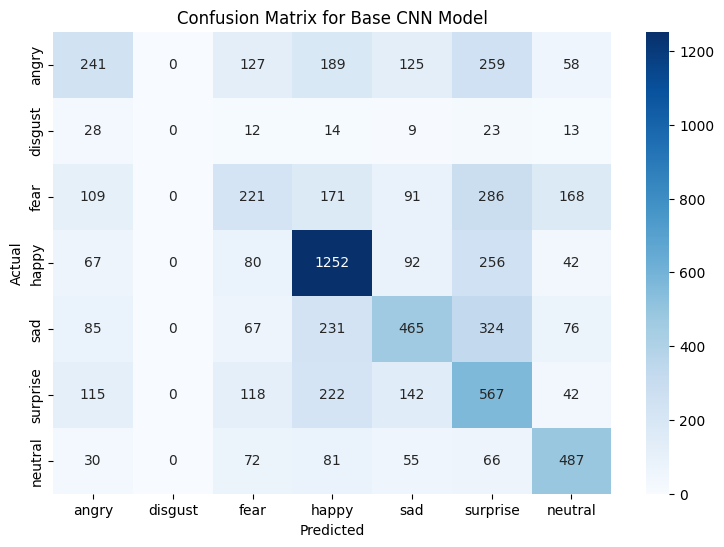

In [152]:
# Evaluate model and create the confusion matrix

matrix = confusion_matrix(y_true=actual_labels, y_pred=pred_labels)
plt.figure(figsize=(9, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Base CNN Model')
plt.show()

## 5c) Your third (🥉) attempt at improving your model goes here. 👇🏻

In [153]:
# Define your finetuned CNN model, call it ImprovedCNNThree()

# IDEA 3
# Increase the number of epochs from 10 to 20. This will aide the model in
# generalizing the data better.

class ImprovedCNNThree(nn.Module):
  def __init__(self, num_classes):
    super(ImprovedCNNThree, self).__init__()
    # was using out_channel=32
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
    # was using in_channel=32 and out_channel=64
    # am not using it now as it took 45+ minutes to train but increase the accuracy by 5%
    # now I loose 5% accuracy byt it takes <10 minutes
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.lin1 = nn.Linear(9216, 16)
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(16, num_classes)

  def forward(self, x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = self.pool(out)

    out = out.reshape(out.size(0), -1)

    out = self.lin1(out)
    out = self.relu(out)
    out = self.lin2(out)
    return out


batch_size = 48
learning_rate = 0.001
num_epochs = 20

model = ImprovedCNNThree(len(categories))

criterion = nn.CrossEntropyLoss()

# kept Adam in since there was such an improvement
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.005)

total_step = len(train_loader)

actual_labels = []
pred_labels = []

for epoch in range(num_epochs):
  model.train()
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('Epoch [{}/{}], Loss: {}'.format(epoch+1, num_epochs, loss.item()))


Epoch [1/20], Loss: 1.5266600847244263
Epoch [2/20], Loss: 1.7525619268417358
Epoch [3/20], Loss: 0.947453498840332
Epoch [4/20], Loss: 1.2302970886230469
Epoch [5/20], Loss: 1.9274795055389404
Epoch [6/20], Loss: 1.2360286712646484
Epoch [7/20], Loss: 1.3050718307495117
Epoch [8/20], Loss: 1.4858872890472412
Epoch [9/20], Loss: 2.047391414642334
Epoch [10/20], Loss: 1.0895973443984985
Epoch [11/20], Loss: 1.2601726055145264
Epoch [12/20], Loss: 1.2860236167907715
Epoch [13/20], Loss: 1.1223284006118774
Epoch [14/20], Loss: 1.6478726863861084
Epoch [15/20], Loss: 1.1815731525421143
Epoch [16/20], Loss: 1.3341882228851318
Epoch [17/20], Loss: 1.4331719875335693
Epoch [18/20], Loss: 1.4928799867630005
Epoch [19/20], Loss: 1.6676294803619385
Epoch [20/20], Loss: 1.49334716796875


In [154]:
# Evaluation on the test set

model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    pred_labels.extend(predicted)
    actual_labels.extend(labels)

  print('Final accuracy of the network: {} %'.format(100 * f1_score(y_true=actual_labels, y_pred=pred_labels, average='weighted')))



Final accuracy of the network: 43.47962851784447 %


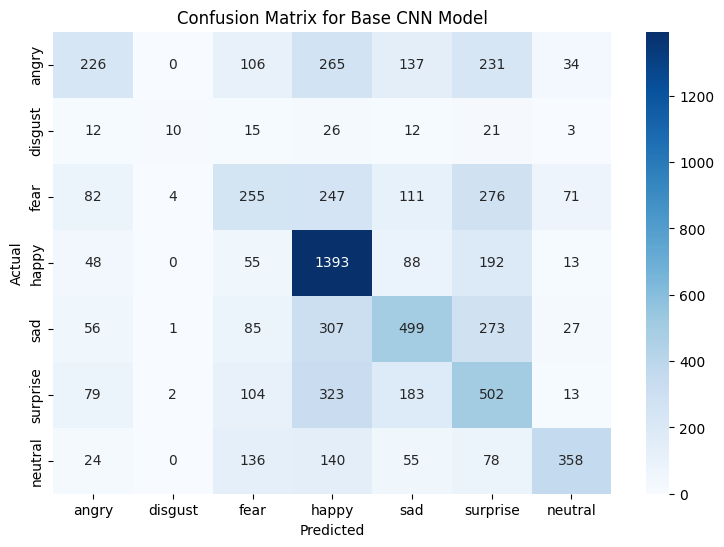

In [155]:
# Evaluate model and create the confusion matrix

matrix = confusion_matrix(y_true=actual_labels, y_pred=pred_labels)
plt.figure(figsize=(9, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Base CNN Model')
plt.show()

❓

Decide which model you would like to present to Dr. Hayes as your final product. Using your performance metric, explain to her why you think this model is the best one. (Make sure to include your confusion matrix and your performance measure.)

✅ I would recommend my third model as it was the most accuracte out of all three (four including the base) models. Additionally, it had a much better time predicted disgust which was a much smaller sample size than the rest of the photos. Traversly, it also had the highest result for correctly identifying happy. This model is the best one additionally because the f1 score takes into account both the precision and recall scores for each of the emotions, giving a balanced idea of what the accuracy of the model would be. You can see this by the more accurate depiction of the disgust emotion from the first model to this model. Even though the scores are relatively close, this model is more precise whereas the first model its recall was better. As you can see, using f1 is the best choice when looking for an accurate model.

In [161]:
print('Final accuracy of the network: {} %'.format(100 * f1_score(y_true=actual_labels, y_pred=pred_labels, average='weighted')))

Final accuracy of the network: 43.47962851784447 %


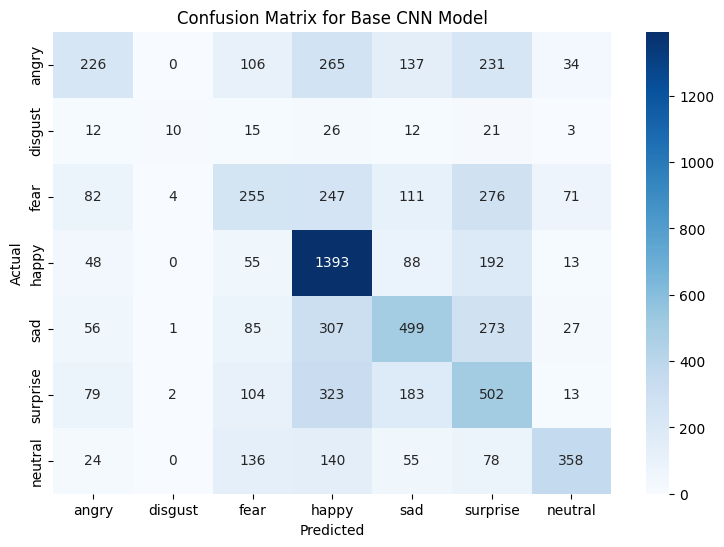

In [159]:
matrix = confusion_matrix(y_true=actual_labels, y_pred=pred_labels)
plt.figure(figsize=(9, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Base CNN Model')
plt.show()

# 6) Final thoughts

❓

Questions from Dr. Hayes:

1. Now that you have developed this model, briefly explain how you will continue to improve your model in future versions?

2. A competitor has recently trained an FFNN on the same dataset that performs worse than your model. Why do you think your CNN performs better?


✅

1. I would carefully analyze the different combinations of preprocessed data and model training to find the best solution that uses the optimal combination of the two. I would potentially look at using a HingeLoss or L2 Loss function instead of a Cross Entropy Loss function instead. I would also find the optimal combination of loss function to optimizer function using functions such as Adagrad or Adam. I would also tune the hyper parameters of learning rate and weight decay (the punish metric) to yield the best result. Additionally, I would use more layers, convolution, pooling, etc. to increase the complexity of the training algorithm and potential accuracy.

2. My CNN would perform better as it takes into account ever possible input and passes it to the output. In an FFNN, the input and output is dependent on what 'shape' the layer of the FFNN is. According the Hundred-Page ML Textbook, if the 'shape' of a layer is a circle, it does nothing and passes the input to the next layer. Whereas if the 'shape' were a rectangle, it performs some mathematical operation and passes the result to the next layer. This can lead to data loss / data leak. Whereas a CNN will pass all the data through every layer, ensuring that each input and output are accurately calculated and manipulated.





# 7) An opportunity! *(optional)*

An external investor is ready to run your model on small device that has a webcam. The device has limited compute resources because it needs to be kept cheap and accessible.

* **Optional step**
> Run the code bellow to see if your model can perform in realtime.

*Please DO NOT change the code below.*

In [156]:
# Neccessary libraries
import cv2
from IPython.display import display, Image, Javascript
from PIL import Image
from google.colab.output import eval_js
from base64 import b64decode

In [157]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

All done! 🤩